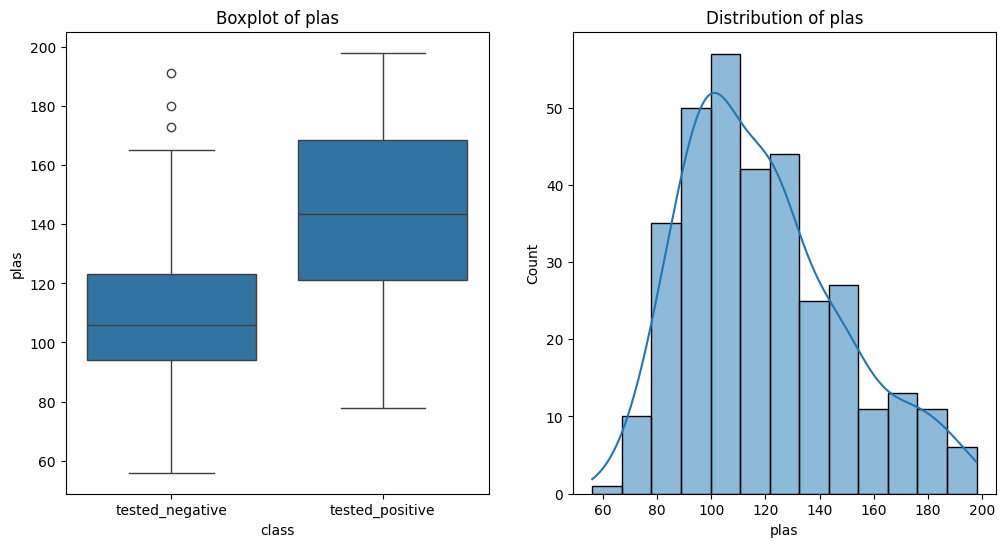

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
diabetes_data = pd.read_csv('Downloads/diabetes.csv')

# Define a function for IQR based outlier detection
def detect_outliers(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df[col] = df[col].apply(lambda x: np.nan if x < lower or x > upper else x)
    return df

# Apply outlier detection
diabetes_data = detect_outliers(diabetes_data)

# Replace zeros with NaN in specific columns where zero values are not meaningful
columns_to_replace_zeros = ['plas', 'pres', 'skin', 'insu', 'mass']
diabetes_data[columns_to_replace_zeros] = diabetes_data[columns_to_replace_zeros].replace(0, np.nan)

# Drop rows with NaN values
diabetes_data.dropna(inplace=True)

# Describing features
feature_description = diabetes_data.describe()

# Rank features using information gain
X = diabetes_data.drop('class', axis=1)  # Assuming 'class' is the outcome column
y = diabetes_data['class']
info_gain = mutual_info_classif(X, y, random_state=0)
info_gain_df = pd.DataFrame(info_gain, index=X.columns, columns=['Information Gain']).sort_values(by='Information Gain', ascending=False)

# Identifying the highest and lowest IG features
highest_ig_feature = info_gain_df.idxmax().item()  # Gets the feature name with the highest information gain
lowest_ig_feature = info_gain_df.idxmin().item()  # Gets the feature name with the lowest information gain

# Plotting the highest and lowest IG features
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=diabetes_data, x='class', y=highest_ig_feature, ax=ax[0])
ax[0].set_title(f'Boxplot of {highest_ig_feature}')
sns.histplot(data=diabetes_data, x=highest_ig_feature, kde=True, ax=ax[1])
ax[1].set_title(f'Distribution of {highest_ig_feature}')

plt.show()
